In [398]:
!pip install jupyterthemes

from jupyterthemes import jtplot
jtplot.style(theme= "monokai", context='notebook', ticks=True, grid=False)

### 2. Import Libraries and data set

In [399]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [400]:
insurance_df=pd.read_csv('insurance.csv')

In [401]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [402]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3. Exploratory Data Analysis

In [403]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [404]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

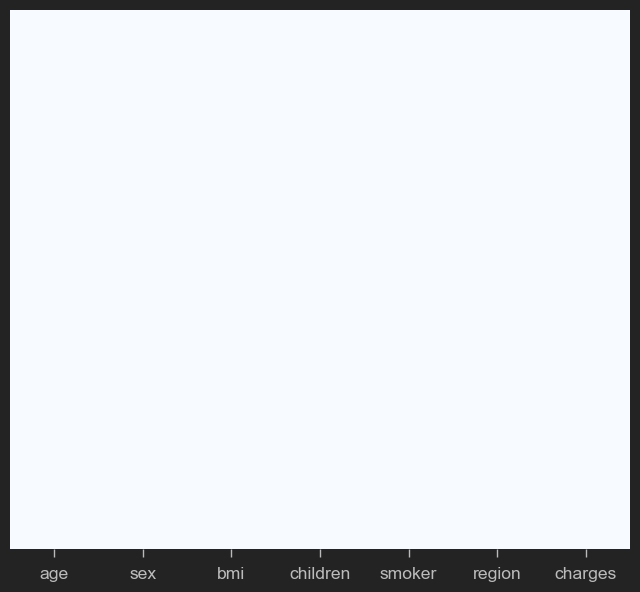

In [405]:
sns.heatmap(insurance_df.isnull(), yticklabels= False, cbar=False, cmap="Blues")

In [406]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [407]:
# group by region

df_region=insurance_df.groupby(by='region').mean()
df_region

C:\Users\Uzma\AppData\Local\Temp\ipykernel_8404\3493499268.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_region=insurance_df.groupby(by='region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Practice 1

In [408]:
df_age=insurance_df.groupby(by='age').mean()
df_age

C:\Users\Uzma\AppData\Local\Temp\ipykernel_8404\2840194224.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_age=insurance_df.groupby(by='age').mean()


,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


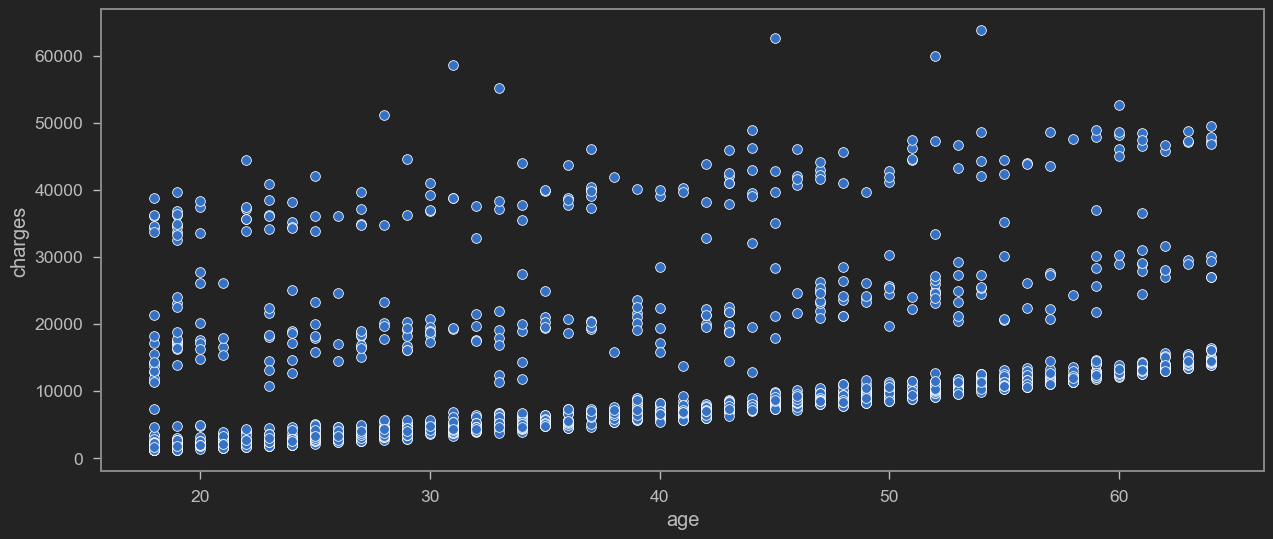

In [409]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data=insurance_df, x='age', y='charges')
plt.show()

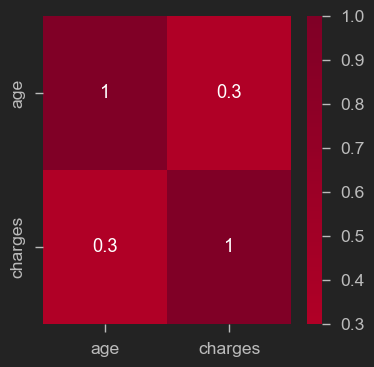

In [410]:
from matplotlib.colors import LinearSegmentedColormap

ylorrd_cmap = sns.color_palette("YlOrRd", as_cmap=True)
custom_cmap = LinearSegmentedColormap.from_list("custom_ylorrd", ylorrd_cmap(np.linspace(0.9, 1)))


# Generate your correlation matrix
correlation_matrix = insurance_df[['age', 'charges']].corr()
plt.figure(figsize = (4, 4))
# Create the heatmap with the custom colormap
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap)
plt.show()


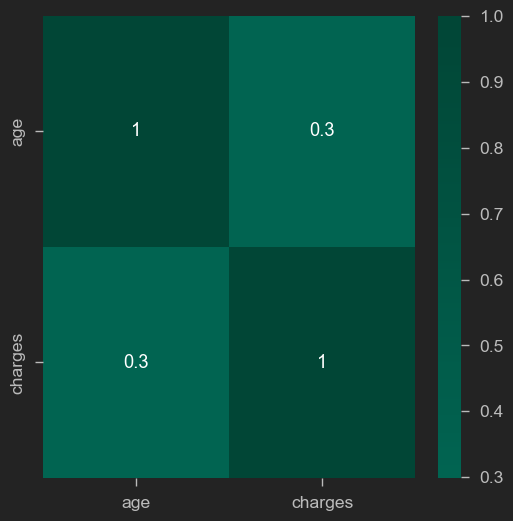

In [411]:
from matplotlib.colors import LinearSegmentedColormap

ylorrd_cmap = sns.color_palette("PuBuGn", as_cmap=True)
custom_cmap = LinearSegmentedColormap.from_list("custom_ylorrd", ylorrd_cmap(np.linspace(0.9, 1)))


# Generate your correlation matrix
correlation_matrix = insurance_df[['age', 'charges']].corr()
plt.figure(figsize = (6, 6))
# Create the heatmap with the custom colormap
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap)
plt.show()


### 4. Perform Feature Engineering

In [412]:
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [413]:
# convert categorical variable to numerical
insurance_df['sex']=insurance_df['sex'].apply(lambda x:0  if x=='female' else 1)

In [414]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [415]:
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [416]:
insurance_df['smoker']=insurance_df['smoker'].apply(lambda x:0 if x=='no' else 1)

In [417]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [418]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [419]:
region_dummies=pd.get_dummies(insurance_df['region'], drop_first=True)

In [420]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [421]:
insurance_df=pd.concat([insurance_df, region_dummies], axis=1)

In [422]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [423]:
# drop original region colum
insurance_df.drop(['region'], axis=1, inplace=True)

In [424]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


### Perform data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

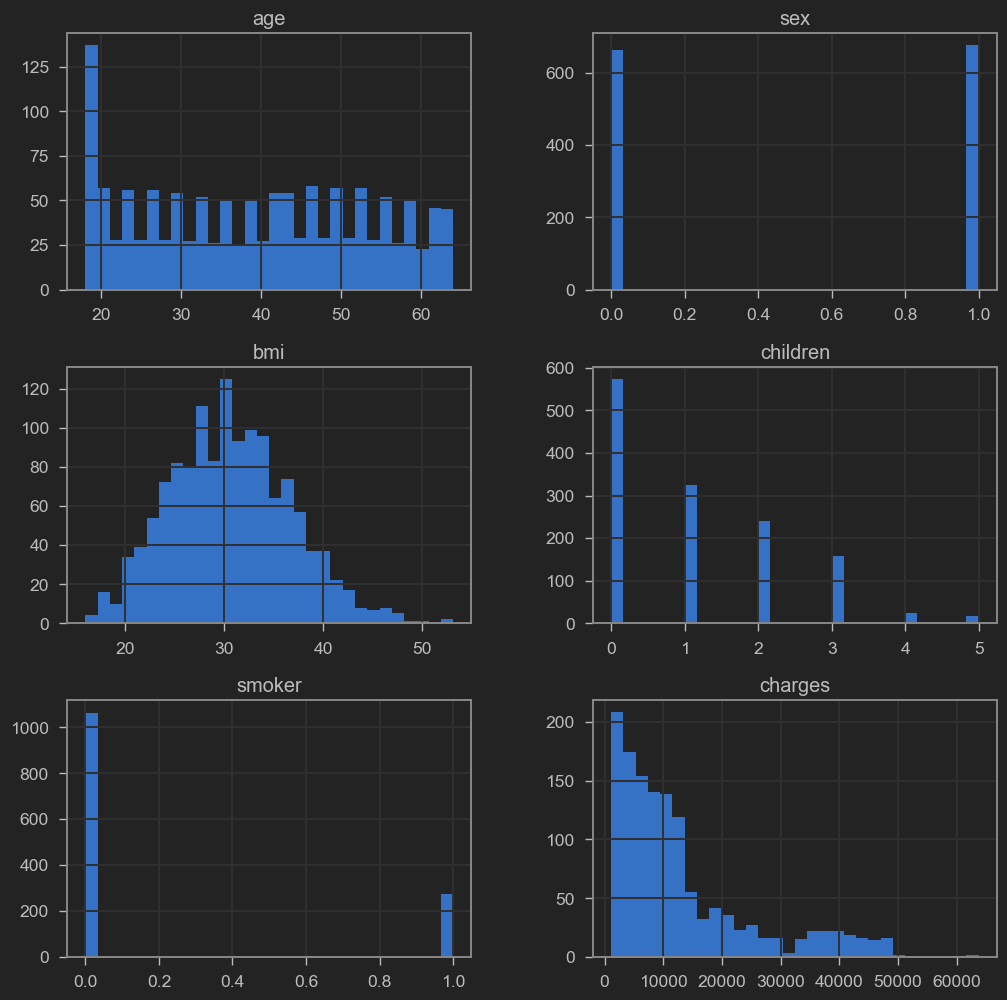

In [425]:
insurance_df[['age', 'sex', 'bmi','children','smoker','charges']].hist(bins=30, figsize=(12,12))

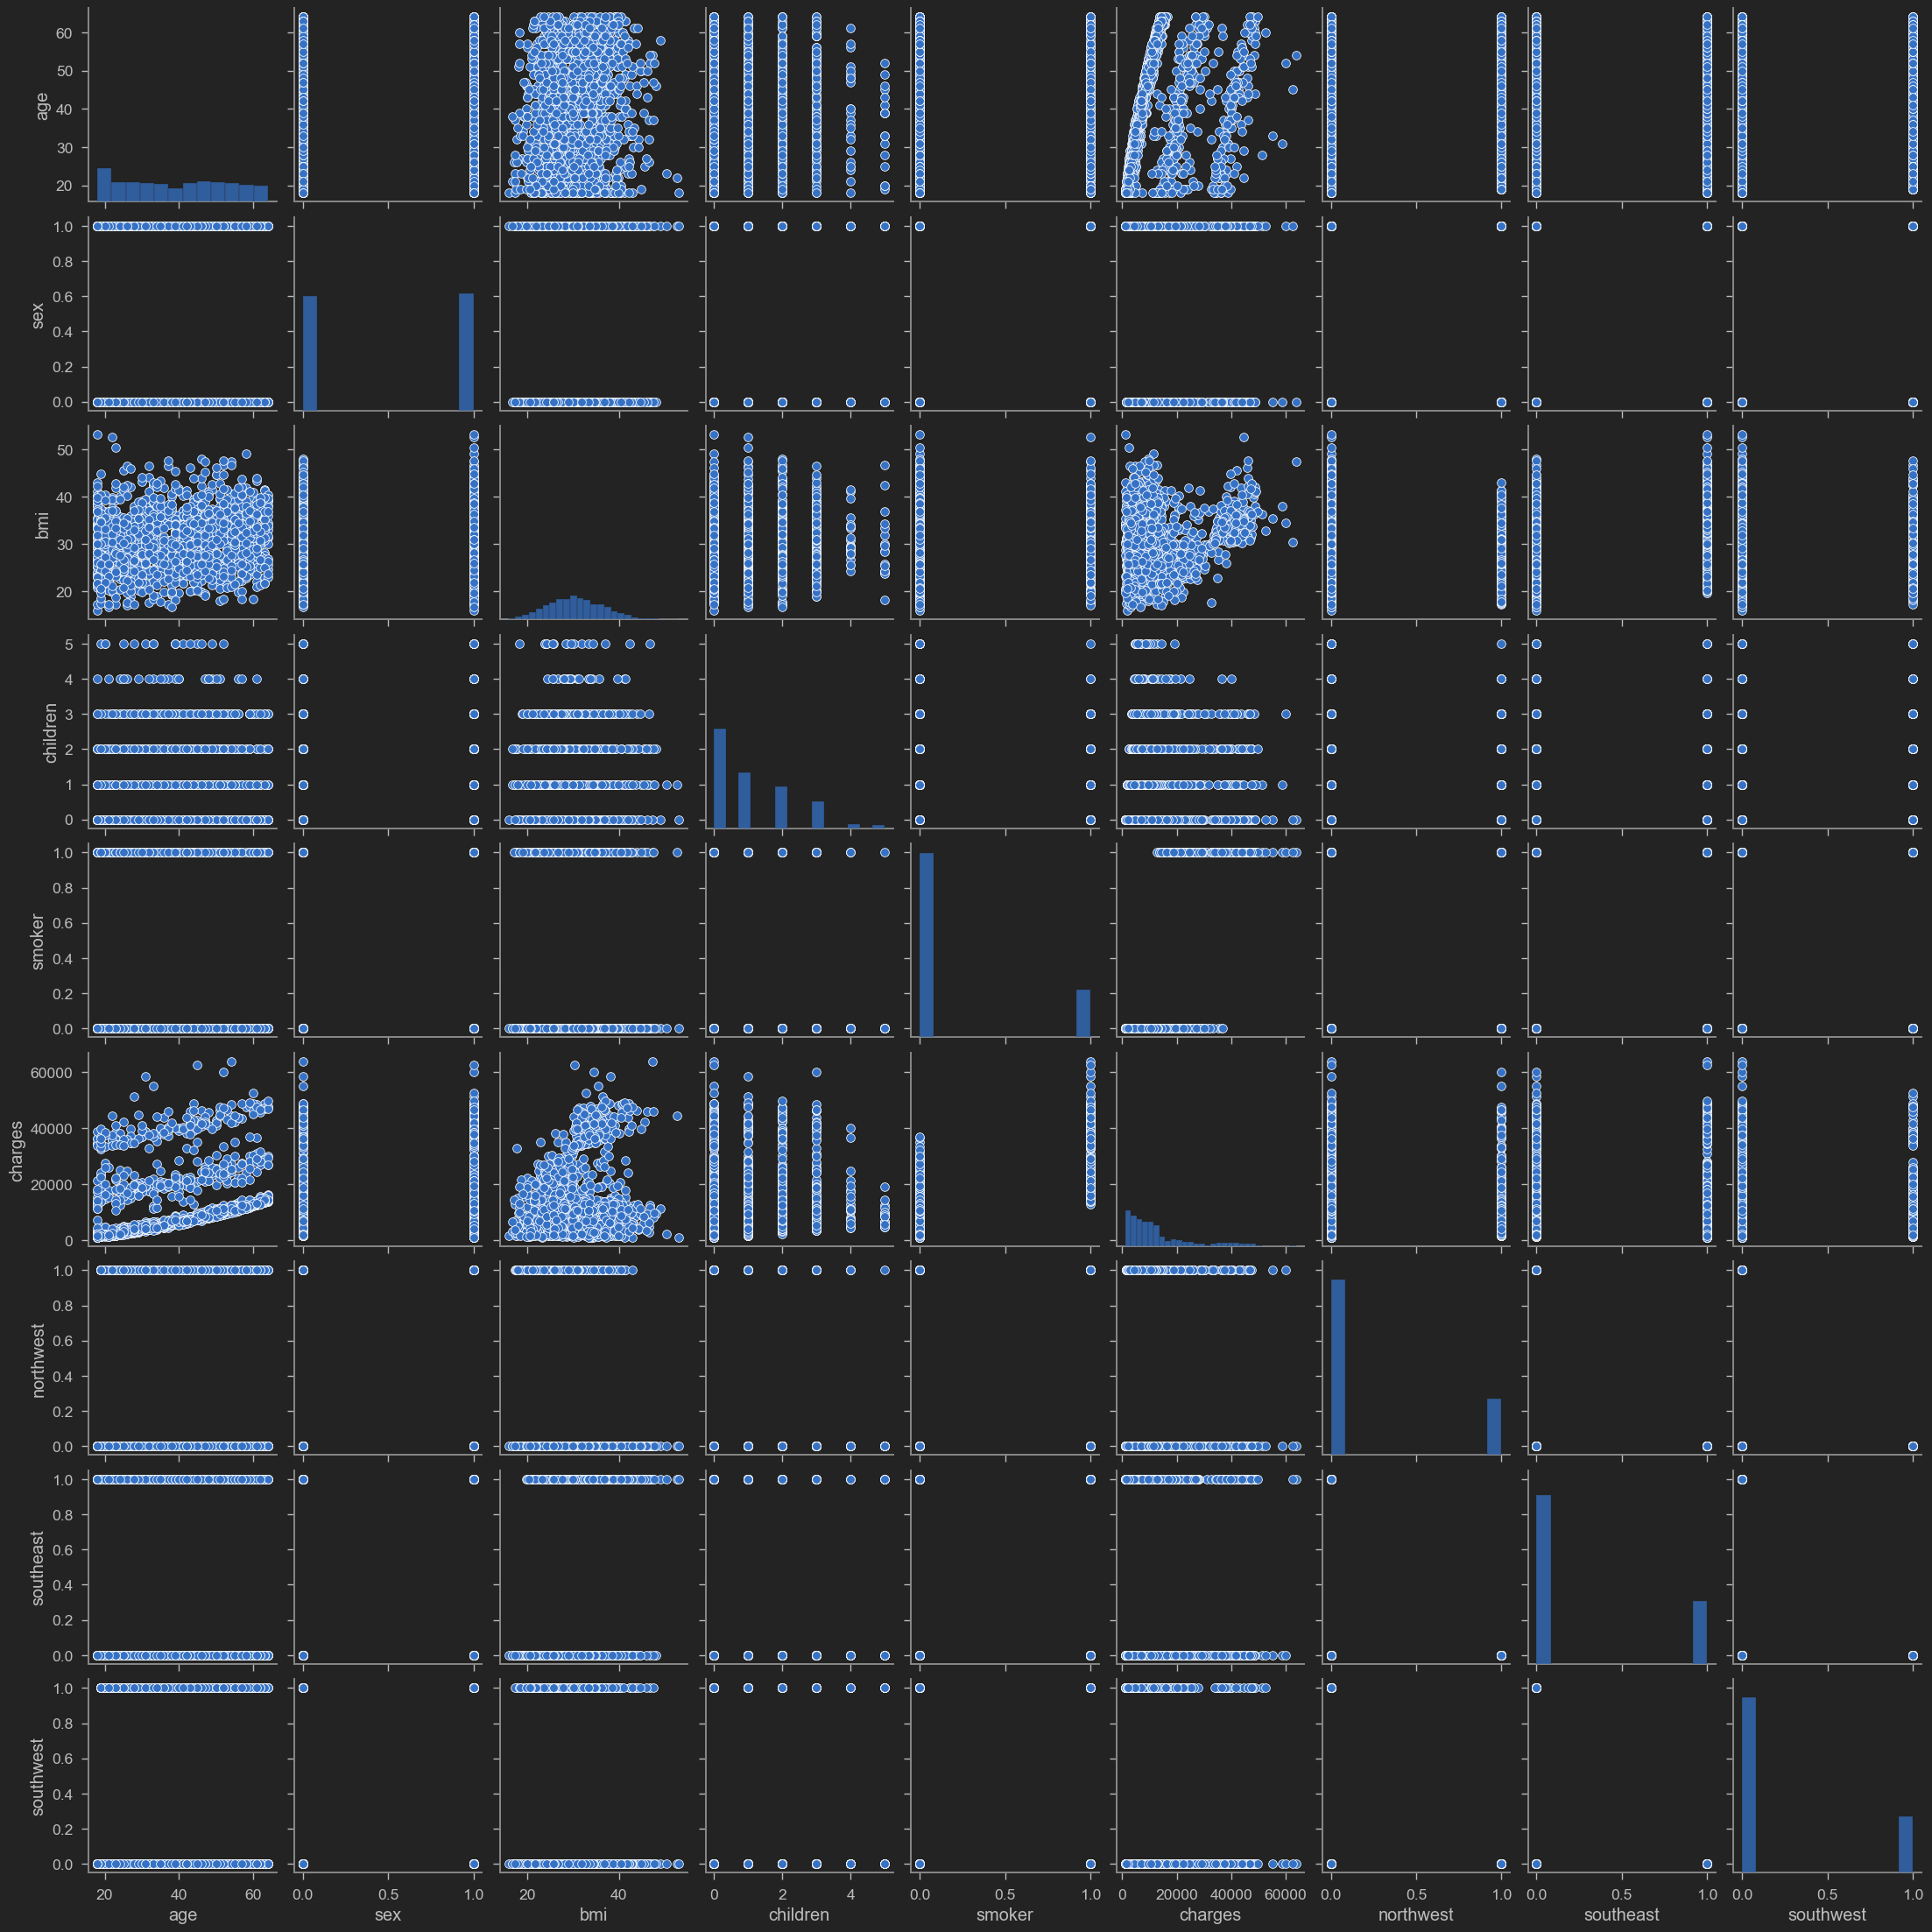

In [426]:
sns.pairplot(insurance_df)

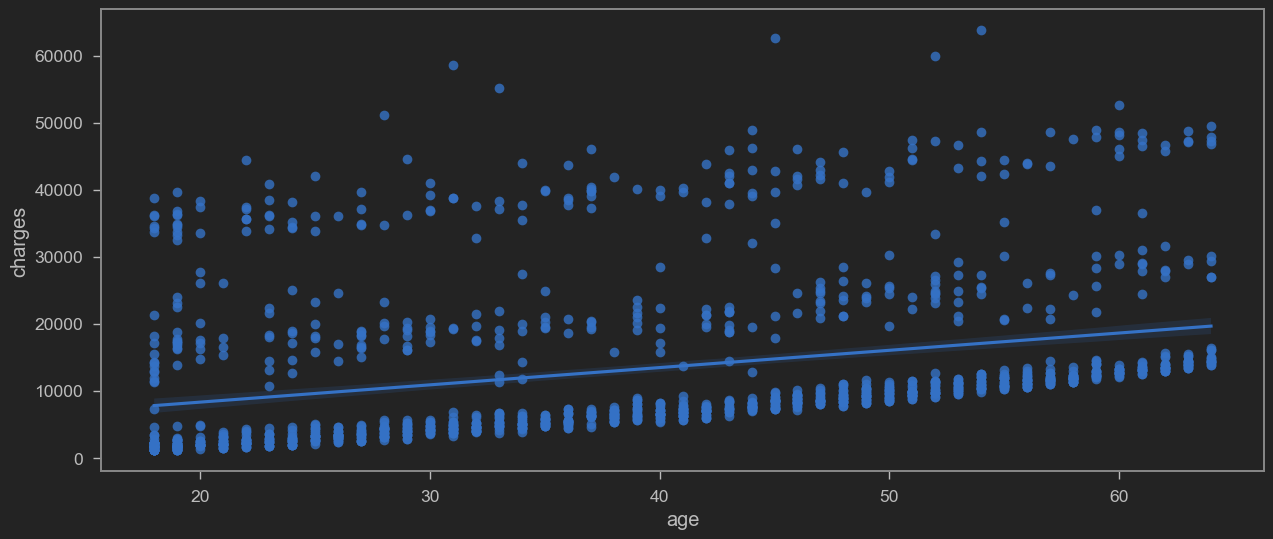

In [427]:
plt.figure(figsize = (15, 6))
sns.regplot(data=insurance_df, x='age', y='charges')
plt.show()

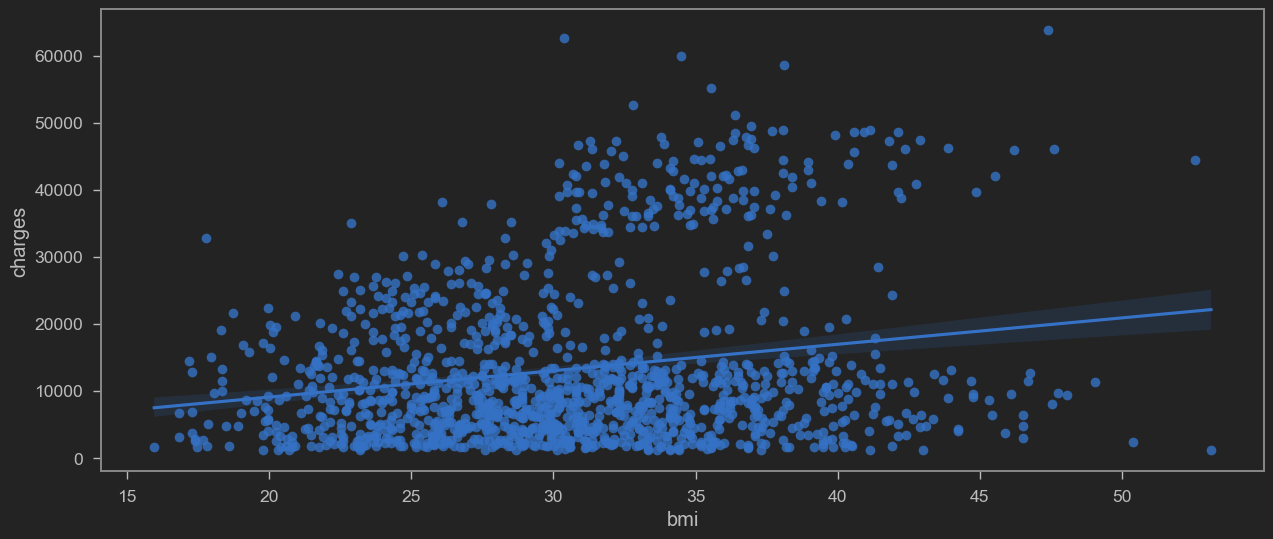

In [428]:
plt.figure(figsize = (15, 6))
sns.regplot(data=insurance_df, x='bmi', y='charges')
plt.show()

In [429]:
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


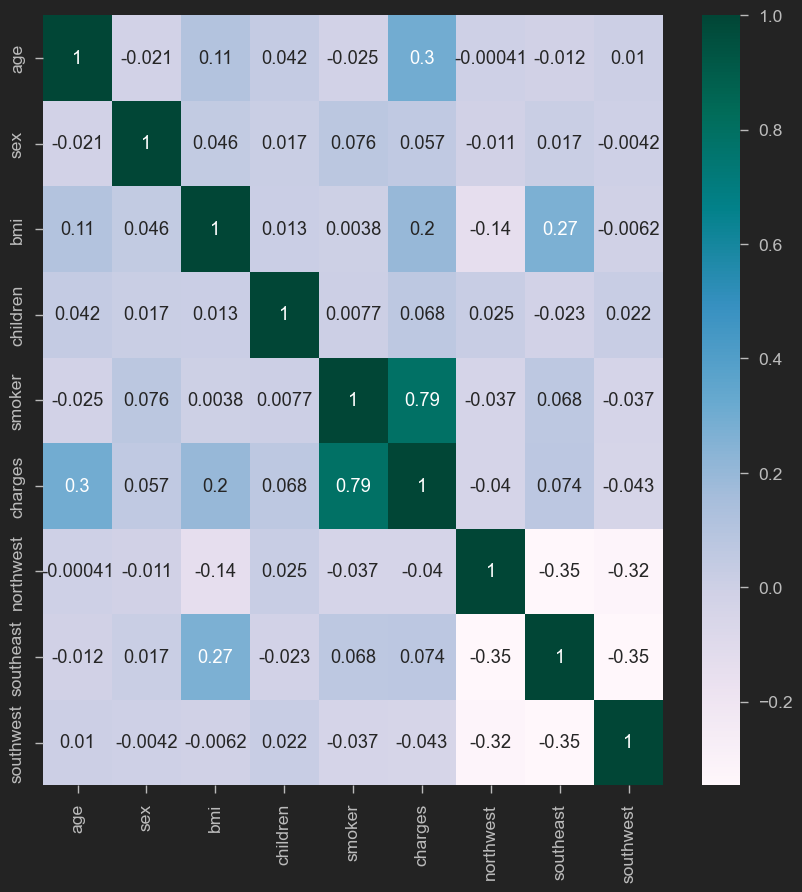

In [430]:
correlation_matrix = insurance_df.corr()

# Create the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='PuBuGn')
plt.show()

### 6. Create training and testing dataset

In [431]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [432]:
X=insurance_df.drop(columns=['charges'])

In [433]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [434]:
y=insurance_df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [435]:
X.shape

(1338, 8)

In [436]:
y.shape

(1338,)

In [437]:
X=np.array(X).astype('float32')
y=np.array(y).astype('float32')

In [438]:
y=y.reshape(-1,1)

In [439]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [440]:
y.shape   #converted to matrix

(1338, 1)

In [441]:
y

array([[16884.924 ],
       [ 1725.5522],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.36  ]], dtype=float32)

In [442]:
# scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x=StandardScaler()
X=scaler_x.fit_transform(X)

scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)

In [443]:
from sklearn.model_selection import train_test_split

In [444]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=10)

In [445]:
X_train.shape

(1070, 8)

In [446]:
X_test.shape

(268, 8)

###  7. Train and Evaluate a Linear Regression Model in Sklearn

In [447]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn=LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [448]:
regression_model_sklearn_accuracy=regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.6953286434739431

In [449]:
y_predict=regression_model_sklearn.predict(X_test)

In [450]:
y_predict_orig=scaler_y.inverse_transform(y_predict)
y_test_orig=scaler_y.inverse_transform(y_test)



In [451]:
k=X_test.shape[1]
n=len(X_test)
n

268

In [452]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [453]:
RMSE=float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)), '.3f'))
MSE=mean_squared_error(y_test_orig,y_predict_orig)
MAE=mean_absolute_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

print('RMSE=', RMSE, '\nMSE=', MSE, '\nMAE=', MAE, '\nR2=',r2, '\nAdjusted R2=', adj_r2)

RMSE= 6536.847 
MSE= 42730370.0 
MAE= 4555.0996 
R2= 0.6953286644091601 
Adjusted R2= 0.6859179667847326


### 8 Train and evaluate an Artificial Neural Network-based regression Model

In [454]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [455]:
ANN_model=keras.Sequential()
ANN_model.add(Dense(50,input_dim=8)) # match with imputs
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mse', optimizer='adam')
ANN_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 50)                450       
                                                                 
 activation_28 (Activation)  (None, 50)                0         
                                                                 
 dense_36 (Dense)            (None, 150)               7650      
                                                                 
 activation_29 (Activation)  (None, 150)               0         
                                                                 
 dense_37 (Dense)            (None, 150)               22650     
                                                                 
 activation_30 (Activation)  (None, 150)               0         
                                                                 
 dense_38 (Dense)            (None, 50)               

In [456]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist=ANN_model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 0.3538 - val_loss: 0.1979
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1722 - val_loss: 0.1866
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1473 - val_loss: 0.1684
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1346 - val_loss: 0.1786
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1354 - val_loss: 0.1753
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1232 - val_loss: 0.1770
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1242 - val_loss: 0.1779
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1188 - val_loss: 0.1873
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1190 - val_loss: 0.1891
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1095 - val_loss: 0.1784
Epoch 11/

In [457]:
result=ANN_model.evaluate(X_test, y_test)
accuracy_ANN=1-result
print("Accuracy :{}".format(accuracy_ANN))

9/9 [==============================] - 0s 1ms/step - loss: 0.2704
Accuracy :0.7295923829078674


In [458]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

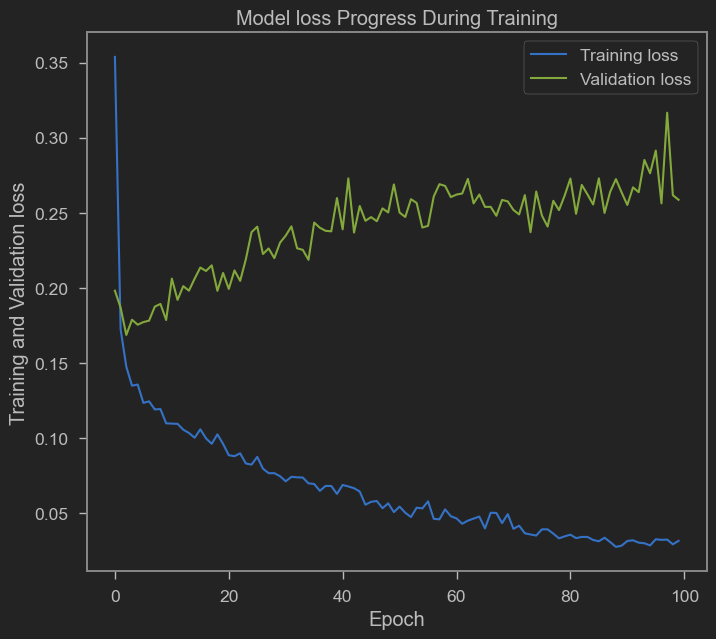

In [459]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation loss')
plt.legend(['Training loss', 'Validation loss'])

As validation is going high, model is overfitting the data

9/9 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

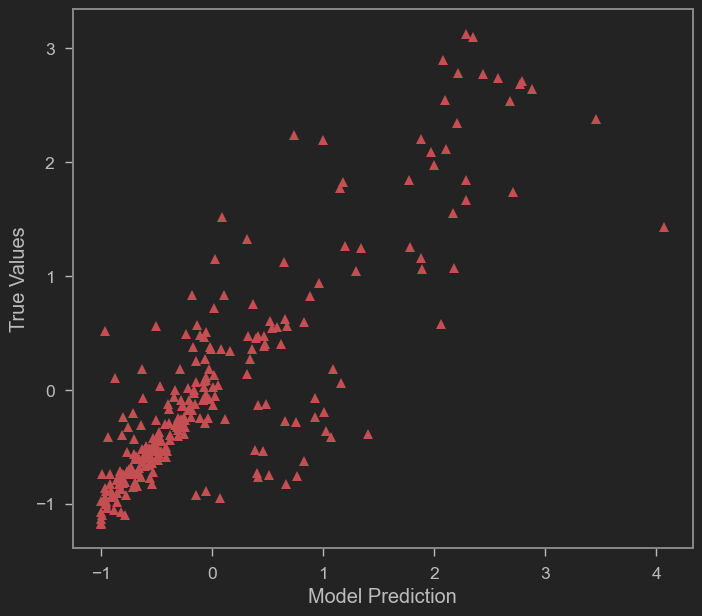

In [460]:
y_predict=ANN_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color='r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')

In [461]:
y_predict_orig=scaler_y.inverse_transform(y_predict)
y_test_orig=scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

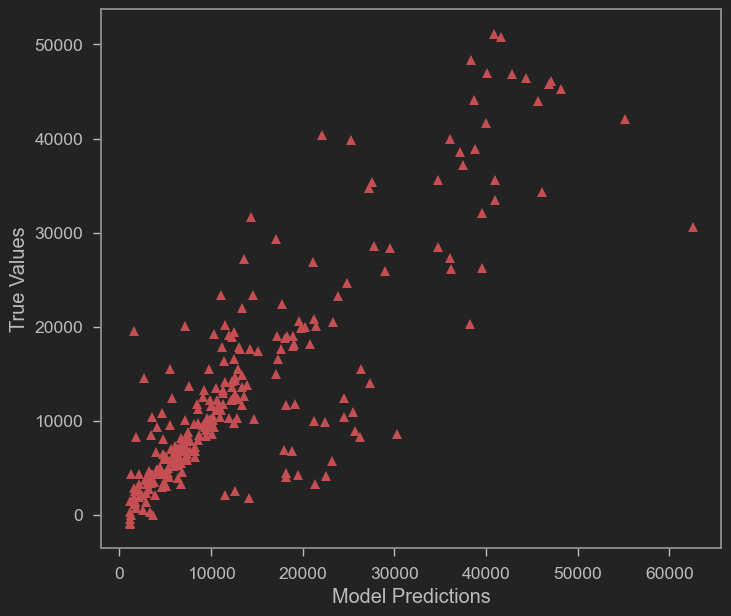

In [462]:
plt.plot(y_test_orig, y_predict_orig, "^", color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [463]:
k=X_test.shape[1]
n=len(X_test)
n

268

In [464]:
RMSE=float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)), '.3f'))
MSE=mean_squared_error(y_test_orig,y_predict_orig)
MAE=mean_absolute_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

print('RMSE=', RMSE, '\nMSE=', MSE, '\nMAE=', MAE, '\nR2=',r2, '\nAdjusted R2=', adj_r2)

RMSE= 6294.941 
MSE= 39626284.0 
MAE= 3760.9836 
R2= 0.7174610672699129 
Adjusted R2= 0.7087339959886747


In [465]:
ANN_model=keras.Sequential()
ANN_model.add(Dense(50,input_dim=8)) # match with imputs
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mse', optimizer='adam')
ANN_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 50)                450       
                                                                 
 activation_32 (Activation)  (None, 50)                0         
                                                                 
 dense_41 (Dense)            (None, 150)               7650      
                                                                 
 activation_33 (Activation)  (None, 150)               0         
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_42 (Dense)            (None, 150)               22650     
                                                                 
 activation_34 (Activation)  (None, 150)             

In [466]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist=ANN_model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
43/43 [==============================] - 1s 6ms/step - loss: 0.6781 - val_loss: 0.2447
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3819 - val_loss: 0.1986
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3117 - val_loss: 0.1946
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2705 - val_loss: 0.2043
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2741 - val_loss: 0.1879
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2385 - val_loss: 0.1807
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2337 - val_loss: 0.1890
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2162 - val_loss: 0.1892
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2083 - val_loss: 0.1774
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1910 - val_loss: 0.1756
Epoch 11/

In [467]:
result=ANN_model.evaluate(X_test, y_test)
accuracy_ANN=1-result
print("Accuracy :{}".format(accuracy_ANN))

9/9 [==============================] - 0s 1ms/step - loss: 0.2155
Accuracy :0.7845291346311569


In [468]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

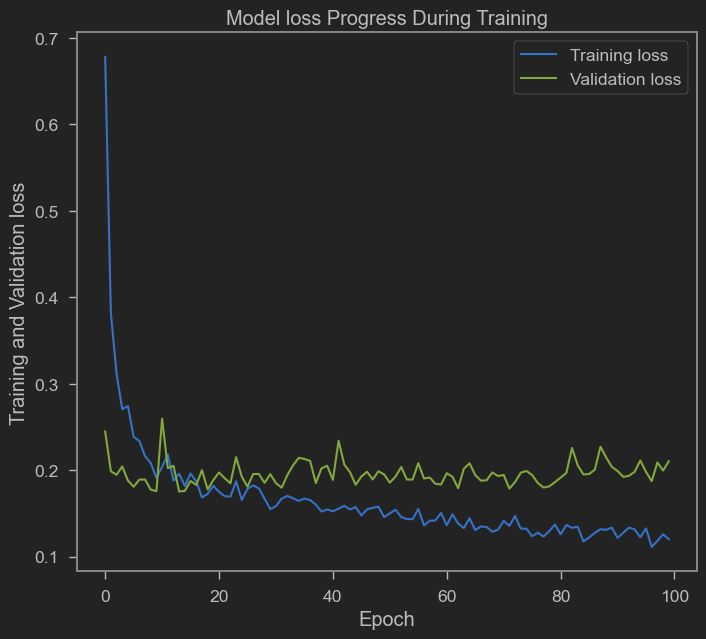

In [469]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation loss')
plt.legend(['Training loss', 'Validation loss'])

9/9 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

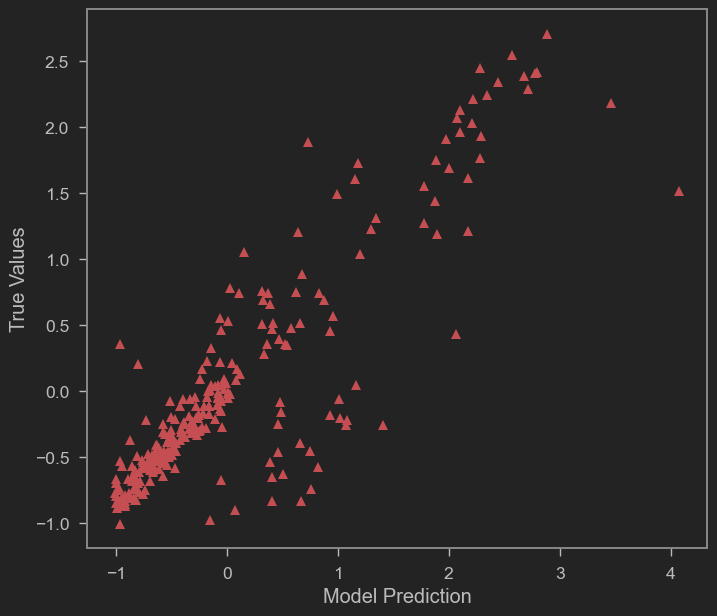

In [470]:
y_predict=ANN_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color='r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')

In [471]:
y_predict_orig=scaler_y.inverse_transform(y_predict)
y_test_orig=scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

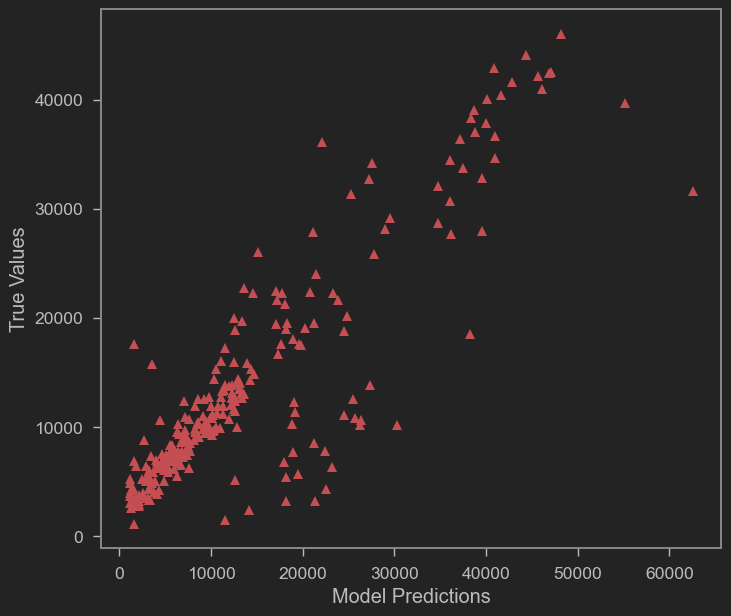

In [472]:
plt.plot(y_test_orig, y_predict_orig, "^", color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [473]:
k=X_test.shape[1]
n=len(X_test)
n

268

In [474]:
RMSE=float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)), '.3f'))
MSE=mean_squared_error(y_test_orig,y_predict_orig)
MAE=mean_absolute_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

print('RMSE=', RMSE, '\nMSE=', MSE, '\nMAE=', MAE, '\nR2=',r2, '\nAdjusted R2=', adj_r2)

RMSE= 5619.226 
MSE= 31575694.0 
MAE= 3404.002 
R2= 0.7748624844211809 
Adjusted R2= 0.7679084298859278


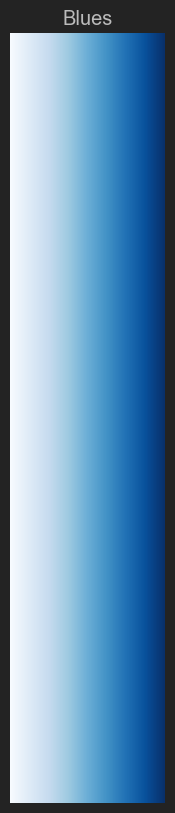

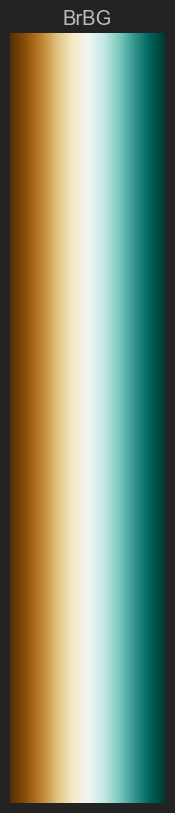

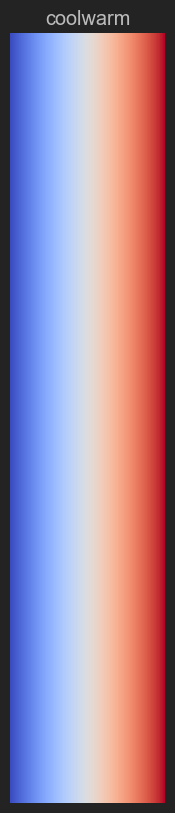

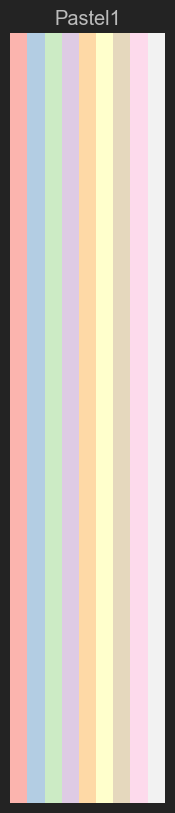

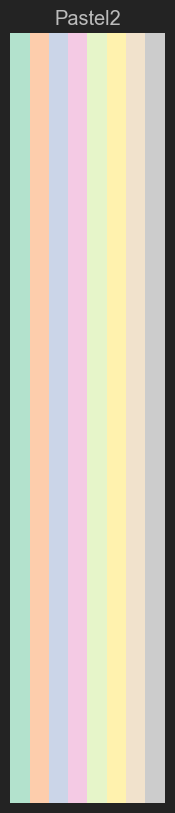

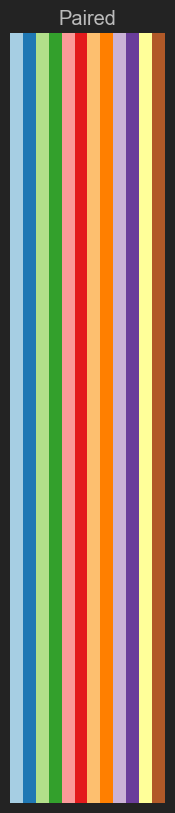

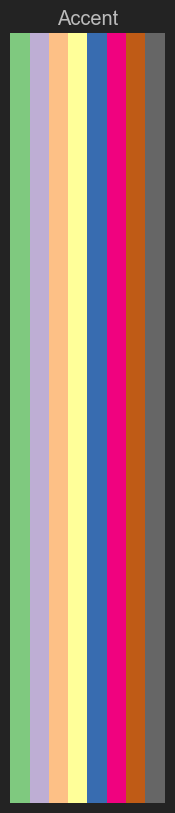

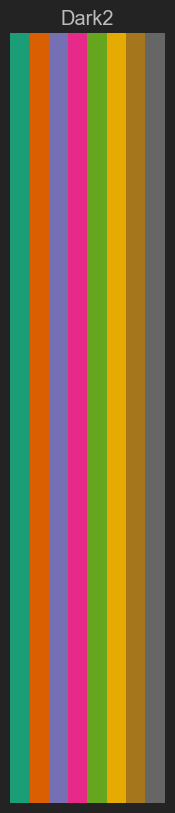

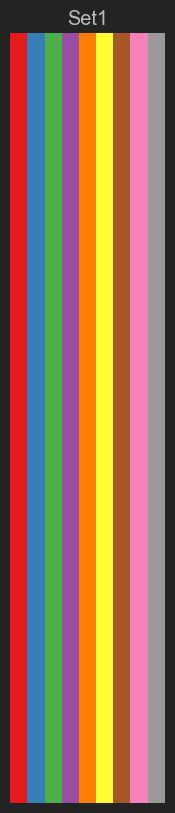

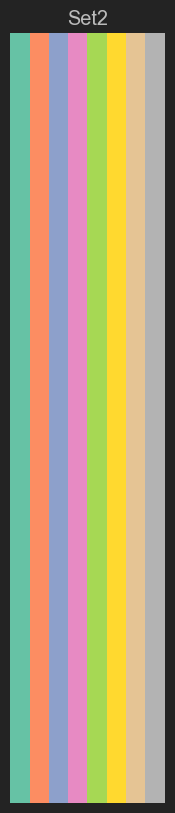

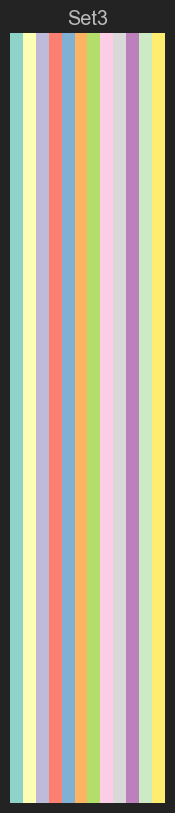

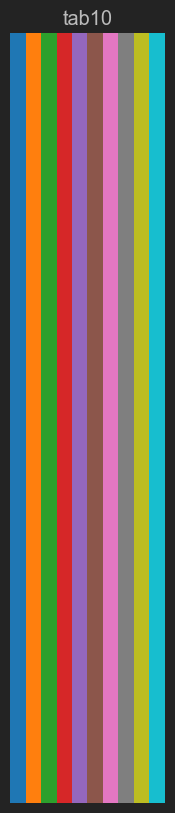

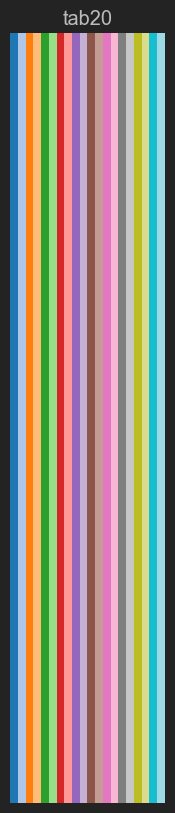

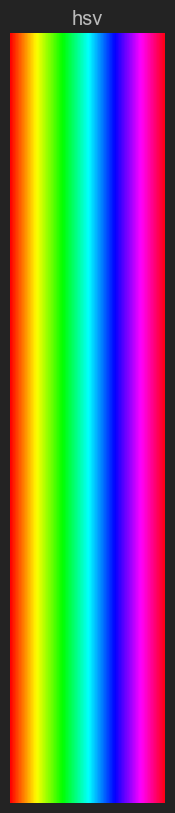

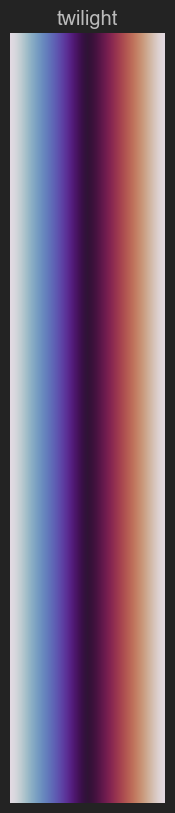

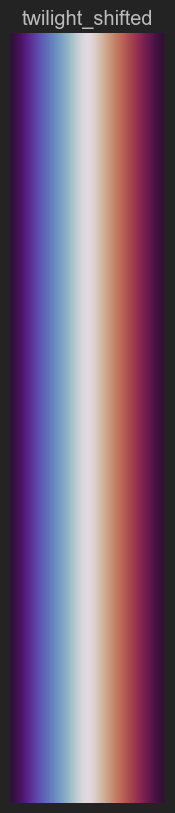

ValueError: 'phase' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

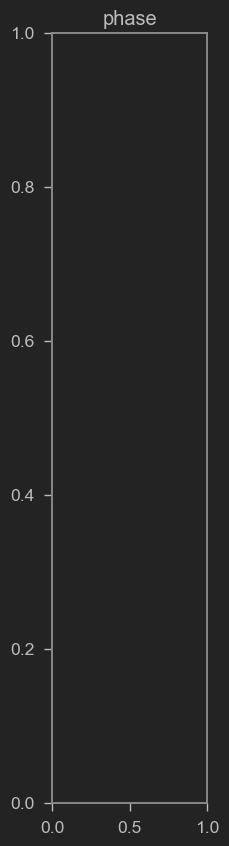

In [475]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
data = np.linspace(0, 1, 256).reshape(1, -1)
data = np.vstack([data, data])

# Display each colormap
names = ["Blues", "BrBG", "coolwarm", "Pastel1", 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20','hsv', 'twilight', 'twilight_shifted', 'phase','BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral','seismic','Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr','YlOrRd']  # add more colormaps to the list
for name in names:
    fig, ax = plt.subplots(figsize=(2, 10))
    ax.set_title(name)
    ax.imshow(data, aspect='auto', cmap=plt.get_cmap(name))
    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
data = np.linspace(0, 1, 256).reshape(1, -1)
data = np.vstack([data, data])

# Display each colormap
names = ['coolwarm', 'PiYG', 'PRGn', 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral','seismic','Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr','YlOrRd']  # add more colormaps to the list
for name in names:
    fig, ax = plt.subplots(figsize=(2, 10))
    ax.set_title(name)
    ax.imshow(data, aspect='auto', cmap=plt.get_cmap(name))
    plt.axis('off')
    plt.show()